#### For this Assignment you have been given a data which is a subset of a bigger dataset which was collected by Buffalo Tax department. It contains information regarding the various properties in Buffalo.

Number of Instances: 92508

Number of Attributes: 16 (including the target variable)

Attribute Information:

| Column Name                | Description                                                                                                                                      | Type        |
|----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| TOTAL VALUE                | The combined assessed value of the land and improvements on the parcel                                                                           | Number      |
| FRONT                      | The width of the front of property (in feet)                                                                                                     | Number      |
| DEPTH                      | The depth of the property (in feet)                                                                                                              | Number      |
| PROPERTY CLASS             | Property Type Classification Codes describe the primary use of each parcel of real property on the assessment roll                               | Number      |
| LAND VALUE                 | The assessed value of the land                                                                                                                   | Number      |
| SALE PRICE                 | The price that the parcel of real property was last sold for                                                                                     | Number      |
| YEAR BUILT                 | The year the primary building on the parcel was built                                                                                            | Number      |
| TOTAL LIVING AREA          | The amount of living space (in square feet)                                                                                                      | Number      |
| OVERALL CONDITION          | A grade of the condition of the property                                                                                                         | Number      |
| BUILDING STYLE             | A code for the style of building                                                                                                                 | Number      |
| HEAT TYPE                  | The type of heating system in the building (only applicable to residential properties)                                                           | Number      |
| BASEMENT TYPE              | The type of basement on the property (only applicable to residential properties)                                                                 | Number      |
| # OF STORIES               | The number of floors/Stories in the property                                                                                                     | Number      |
| # OF FIREPLACES            | The number of fireplaces in a dwelling (only applicable to residential properties)                                                               | Number      |
| # OF BEDS                  | The number of beds in a dwelling (only applicable to residential properties)                                                                     | Number      |
| # OF BATHS                 | The number of baths in a dwelling (only applicable to residential properties)                                                                    | Number      |
| # OF KITCHENS              | The number of kitchens in a dwelling (only applicable to residential properties)                                                                 | Number      |



There are no missing Attribute Values.

Your task is to implement a Linear Regression Model to predict the TOTAL VALUE of a property

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

#### STEP 1 - Load Data (Already Done)

In [2]:
df = pd.read_csv('data.csv', dtype=np.float64)

In [3]:
y = np.asarray(df['TOTAL VALUE'] )
y = y.reshape(y.shape[0],1)
feature_cols = df.columns.to_list()
feature_cols.remove('TOTAL VALUE')
x = np.asarray(df[feature_cols])

#### STEP 2 - Split the Data into training and testing and validation split ( 70% Training, 20% Testing and 10% validation) ( Hint: you can use the sklearn library for this step only) ( 5 Points)

Variable **y** contains the total values of the property

Variable **x** contains the features

In [4]:
#STEP 2
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.3333, random_state=1)

#### STEP 3 - Scale Data Using Min Max Scaler (10 Points)
For each feature scaled value can be calculated using $  x_{scaled} = \frac{x - min(x)}{max(x) - min(x)}$


In [5]:
X_train_scales = np.zeros(np.shape(X_train))
minInColumns = np.amin(X_train, axis=0)
maxInColumns = np.amax(X_train, axis=0)
for i in range(len(X_train)):
    for j in range(len(X_train[0])):
        X_train_scales[i][j] = (X_train[i][j]- minInColumns[j])/(maxInColumns[j] - minInColumns[j])

In [6]:
#STEP 4
import random
learning_rate = 0.0001 
no_of_epochs = 500  #The number of iterations to be 500
weights = np.zeros((15,1))    #Initializing the weights to zero
b = 0 #Initializing bias to zero

#### STEP 5 - Train Linear Regression Model (40 Points)
 5.1 Start a Loop For each Epoch
 
 5.2 Find the predicted value using $ y(x,w) = w_0 + w_1x $ for the training and validation splits (10 Points)
 
 5.3 Find the Loss using Mean Squared Error for the training and validation splits and store in a list (10 Points)
 
 5.4 Calculate the Gradients (15 Points)
 
 5.5 Update the weights using the gradients (5 Points)

In [7]:
cv_plot =[]
train_plot = []
x_tran = np.transpose(X_train_scales)
for i in range(no_of_epochs):
    Y_pred = b + X_train_scales.dot(weights)
    dW = - ( 2 * ( x_tran ).dot( y_train - Y_pred )  ) / len(X_train)
    db = - 2 * np.sum( y_train - Y_pred ) / len(X_train) 
    weights = weights - learning_rate * dW
    b = b -learning_rate * db 
    Y_cv_pred = b + X_cv.dot(weights)                 # Predicting using CV dataset  
    cv_plot.append(metrics.mean_squared_error(y_cv, Y_cv_pred))                                 # Creating array for CV loss
    train_plot.append(metrics.mean_squared_error(y_train, Y_pred))                              # Creating array for Train loss
print(weights , b)

[[  30.33773206]
 [  98.98051606]
 [3388.23610401]
 [ 427.70784182]
 [  97.55172634]
 [3726.59687453]
 [ 692.50812329]
 [2662.16302945]
 [1861.30927879]
 [2478.83963037]
 [3732.44656563]
 [ 211.10933799]
 [1376.06577983]
 [1040.66543017]
 [1983.92913283]] 10408.72854872959


In [8]:
X_test_scales = np.zeros(np.shape(X_test))
minInColumns = np.amin(X_test, axis=0)
maxInColumns = np.amax(X_test, axis=0)
for i in range(len(X_test)):
    for j in range(len(X_test[0])):
        X_test_scales[i][j] = (X_test[i][j]- minInColumns[j])/(maxInColumns[j] - minInColumns[j])

In [9]:
Y_test_pred = b+ X_test.dot(weights)

In [10]:
metrics.mean_squared_error(y_test, Y_test_pred)

4001538722658172.5

#### STEP 6 - Evaluate the Model ( 25 Points)
6.1 Plot a graph of the Training and Validation Loss wrt epochs (10 Points)

6.2 Find the R2 Score of the trained model for the Train, Test and Validation splits (15 Points)

In [11]:
print("R2 score for test data set: ",metrics.r2_score(y_test, Y_test_pred))
print("R2 score for train data set: ",metrics.r2_score(y_train, Y_pred))
print("R2 score for cross validation data set: ",metrics.r2_score(y_cv, Y_cv_pred))

R2 score for test data set:  -5926.719591056363
R2 score for train data set:  -0.004194860263434741
R2 score for cross validation data set:  -9435.020113792118


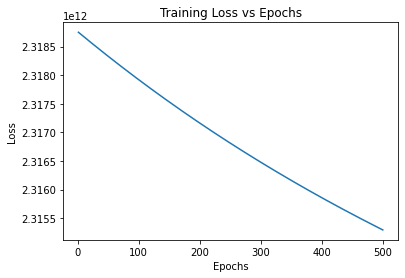

In [12]:
x = range(1,501)
#plt.plot(x, cv_plot)
plt.plot(x, train_plot)
plt.title("Training Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


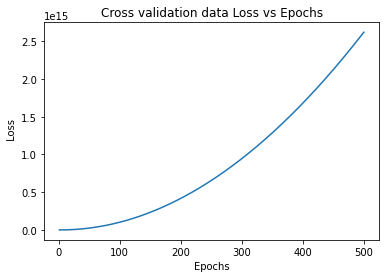

In [13]:
plt.plot(x, cv_plot)
plt.title("Cross validation data Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel(" Loss")
plt.show()